<a href="https://colab.research.google.com/github/adyasham/Statistical-Analysis/blob/main/Retail_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import sqlite3

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data = pd.read_excel(url)

# Inspect the first few rows
print("First few rows of the dataset:")
print(data.head())

# Data Cleaning: Remove missing CustomerID and convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.dropna(subset=['CustomerID'], inplace=True)

# Create an SQLite Database and ETL Pipeline
conn = sqlite3.connect('retail_data.db')
data.to_sql('retail_data', conn, if_exists='replace', index=False)

# Query the database to verify the data
query = "SELECT * FROM retail_data LIMIT 5"
result = pd.read_sql(query, conn)
print("Sample data after loading into SQL database:")
print(result)


First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Sample data after loading into SQL database:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEA

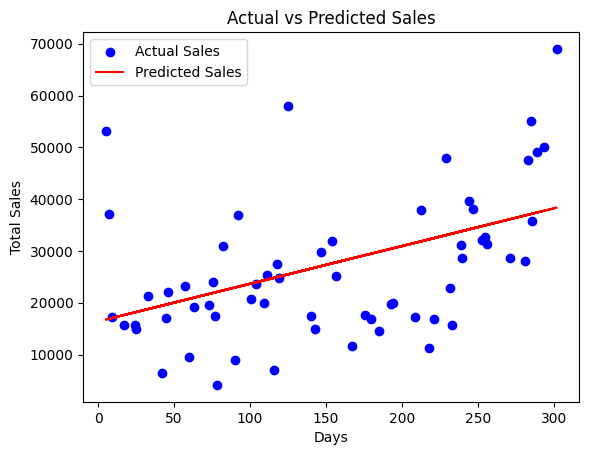

In [2]:
# Import necessary libraries for modeling and visualization
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create a feature: total sales
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# Group data by Date to aggregate daily sales
daily_data = data.groupby(data['InvoiceDate'].dt.date)['TotalSales'].sum().reset_index()

# Prepare data for modeling
X = np.array(daily_data.index).reshape(-1, 1)  # Features (days)
y = daily_data['TotalSales'].values  # Target (Total Sales)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Plot Actual vs Predicted Sales
plt.scatter(X_test, y_test, label='Actual Sales', color='blue')
plt.plot(X_test, y_pred, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Days')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


In [3]:
# Example SQL query to extract total sales by country
query = """
SELECT Country, SUM(Quantity * UnitPrice) AS TotalRevenue
FROM retail_data
GROUP BY Country
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
top_countries = pd.read_sql(query, conn)
print("Top 10 Countries by Total Revenue:")
print(top_countries)


Top 10 Countries by Total Revenue:
          Country  TotalRevenue
0  United Kingdom  6.767873e+06
1     Netherlands  2.846615e+05
2            EIRE  2.502852e+05
3         Germany  2.216982e+05
4          France  1.967128e+05
5       Australia  1.370773e+05
6     Switzerland  5.573940e+04
7           Spain  5.477458e+04
8         Belgium  4.091096e+04
9          Sweden  3.659591e+04


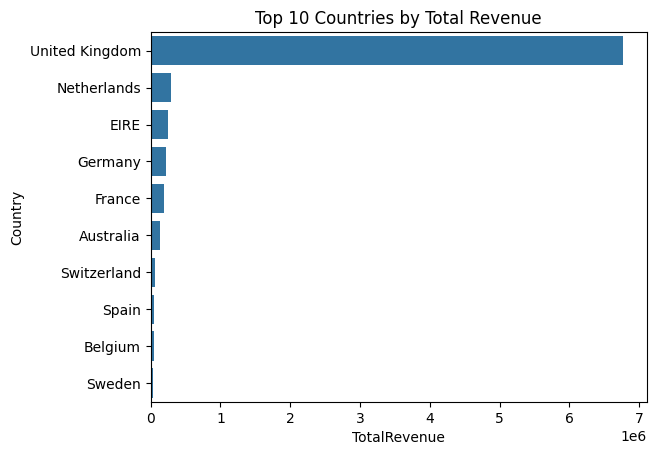

In [4]:
# Import Seaborn for barplot visualization
import seaborn as sns

# Visualize top 10 countries by revenue
sns.barplot(x='TotalRevenue', y='Country', data=top_countries)
plt.title('Top 10 Countries by Total Revenue')
plt.show()


In [5]:
# Export the cleaned dataset for use in Power BI
daily_data.to_csv('cleaned_retail_data.csv', index=False)


In [7]:
git init
git add .
git commit -m "Initial commit"
git remote add origin https://github.com/yourusername/Retail-Analytics-Project.git
git push -u origin master

SyntaxError: invalid syntax (<ipython-input-7-83f8e289d753>, line 1)